In [1]:
#If opening in colab run this cell
!git clone https://github.com/bwolfson2/foster_2020
%cd foster_2020/Homeworks

Cloning into 'foster_2020'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 297 (delta 61), reused 155 (delta 29), pack-reused 109
Receiving objects: 100% (297/297), 60.59 MiB | 15.53 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Checking out files: 100% (123/123), done.
/content/foster_2020/Homeworks


# IF OPENING IN COLAB, PLEASE REMEMBER TO SAVE THE NOTEBOOK TO YOUR GOOGLE DRIVE

To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_2020/blob/master/Homeworks/HW_4.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

# Homework 4

## Part I: Sentiment Analysis for Movie Reviews

Sentiment analysis is a hot topic in data science right now due to the immense amount of user-generated text data being created every day online.  Businesses can now look at what is being said about them on review sites to get an idea of how well they are liked, how much they are disliked, and what they can do to improve.  While most of this data is unlabeled, some sites also ask users to provide a numerical or star rating.  This allows us to build a classifier for positive/negative reviews using the star rating as a label, which could then be hypothetically applied to unlabeled text.

IMDB collects information about movies and lets users write their own reviews, as well as provide a 1-10 numerical rating.   The data for this assignment can be found in 'IMDB_TRAIN.csv' and IMDB_TEST.csv', the training and test data respectively. It consists of thousands of positive and negative reviews collected from IMDB.  The ratings have been binarized by labeling anything with score between 7 and 10 as “P” and anything between 1 and 4 with “N” (there are no “neutral” reviews in the data).  You will build and evaluate a system that classifies these movie reviews as positive or negative.

__1. Load the training data and the test data. No points for this.__

In [2]:
import pandas as pd

# Remember to change this to the path of your files.
train_path = 'data/IMDB_TRAIN.csv'
test_path = 'data/IMDB_TEST.csv'

columns = ['text', 'class']
df_imdb_train = pd.read_csv(train_path, names=columns)
df_imdb_test = pd.read_csv(test_path, names=columns)
df_imdb_train.head()

,text,class
0,'If you hit your teens in the 70s as I did you...,N
1,'Excellent endearing film with Peter Falk and ...,P
2,'Oh dear what a horrid movie. The production w...,N
3,'This is a terrible production of Bartleby tho...,N
4,'I actually have a fondness for Christopher Le...,N


__2. Build a Bernoulli Naive Bayes model to classify reviews according to their sentiment using a binary count vectorizer (check out the text mining module in the class notebooks if you do not know what this question is talking about). Test its accuracy on the test data. Is it good compared to just predicting a positive sentiment for all reviews?__

In [0]:
import matplotlib.pylab as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [4]:
print(df_imdb_train.isnull().values.any())
print(df_imdb_test.isnull().values.any())  #find if there are null values in the train and test data 

False
True


In [5]:
df_imdb_test.isnull().sum()

text     0
class    1
dtype: int64

In [0]:
df_imdb_test = df_imdb_test.dropna()

In [7]:
binary_vectorizer = CountVectorizer(binary=True)
binary_vectorizer.fit(df_imdb_train['text'])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [8]:
vocabulary_list = list(zip( binary_vectorizer.vocabulary_.keys(), binary_vectorizer.vocabulary_.values()) )
vocabulary_list[0:10]

[('if', 35904),
 ('you', 81954),
 ('hit', 34359),
 ('your', 81990),
 ('teens', 72629),
 ('in', 36417),
 ('the', 73167),
 ('70s', 1044),
 ('as', 4999),
 ('did', 20207)]

In [0]:
X_train_binary = binary_vectorizer.transform(df_imdb_train['text'])
X_test_binary = binary_vectorizer.transform(df_imdb_test['text'])

In [10]:
X_train_binary

<25000x82549 sparse matrix of type '<class 'numpy.int64'>'
	with 3461531 stored elements in Compressed Sparse Row format>

In [11]:
X_test_binary[0:20, 13180:13200].todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0,

In [0]:
def get_model_roc(models, Xs_test, names, Y_test):
    plt.rcParams['figure.dpi'] = 100
    for i in range(len(models)):
        model = models[i]
        X_test = Xs_test[i]
        name = names[i]
        probs = model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, probs, pos_label='P')
        plt.plot(fpr, tpr, label=name)
        plt.plot([0, 1], [0, 1], linestyle='dashed', color='black')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        print ("AUC for {0} = {1:.3f}".format(name, metrics.roc_auc_score(Y_test, probs)))
    plt.legend()
    plt.show()


In [13]:
model_nb = BernoulliNB()
model_nb.fit(X_train_binary, df_imdb_train['class'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

AUC for Naive Bayes = 0.969


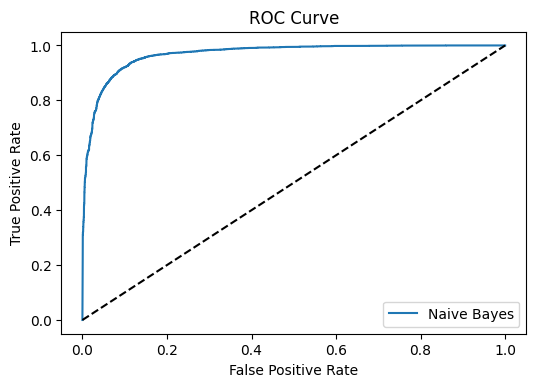

In [14]:
get_model_roc([model_nb], [X_test_binary], ['Naive Bayes'], df_imdb_test['class'])

In [15]:
from sklearn.metrics import accuracy_score
print ("Accuracy on testing = %.4f" % accuracy_score(model_nb.predict(X_test_binary), df_imdb_test['class']) )

Accuracy on testing = 0.9032


The accuracy is very high. 

In [18]:
base_rate = (len(df_imdb_test[df_imdb_test['class']=='P'])/len(df_imdb_test))*100
print('If we only predict the positive sentiment for all reviews, the accuracy is '+ str(base_rate) +'%')

If we only predict the positive sentiment for all reviews, the accuracy is 49.88822214378162%


__3. Pick a few reviews in the test set that were incorrectly classified and read them through.  Are there any words in these misclassified reviews that may have misled the classifier?  Explain with at least three examples for each type of error (i.e., false positive and false negative).__
* For example: Instance number X contains the sentence, “Even her worst . . . I will stop here to avoid the spoiler.”  Even though this is actually positive, it was classified as a negative review; I would guess that this is due to the word “worst” in the review.

In [0]:
# Your answer here.
preds = model_nb.predict(X_test_binary)
df_imdb_test['preds'] = preds

In [0]:
df_imdb_test

,text,class,preds
0,'One of the first of the best musicals Anchors...,P,P
1,'Visually disjointed and full of itself the di...,N,N
2,'These type of movies about young teenagers st...,P,P
3,'I would rather of had my eyes gouged out with...,N,N
4,'The title says it all. Tail Gunner Joe was a ...,N,N
...,...,...,...
8495,'Alright friends a serious movie buff is expec...,N,N
8496,'I found this film embarrassing to watch. I fe...,N,N
8497,'To put it simply I am not fond of westerns. A...,N,N
8498,'Some of these viewer comments are just ridicu...,N,N


In [0]:
diff = df_imdb_test[df_imdb_test['class'] != df_imdb_test['preds']]

In [0]:
diff

,text,class,preds
24,'CREEP is a straight up serious horror film se...,P,N
26,'Val Kilmer solid performance. Dylan McDermott...,N,P
27,'A surprisingly good movie! It has quite a few...,P,N
36,'John Wayne & Albert Dekker compete for oil ri...,N,P
49,'This movie has recieved horrible ratings from...,P,N
...,...,...,...
8403,'This movie is without a doubt a perfect 10/10...,P,N
8429,'Doctor Mordrid is one of those rare films tha...,P,N
8474,'I just got this video used and I was watching...,P,N
8481,'I did enjoy this film I thought it ended up b...,P,N


In [0]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [0]:
diff[diff['preds']=='N'].head(3)

,text,class,preds
24,'CREEP is a straight up serious horror film set in real time that wants nothing more than to just show people get attacked in a empty subway platform by a mutant for 85 minutes. And it does just that. Nothing more nothing less. Director Christopher Smith draws out the drama a far as he plausibly can by introducing a series of characters that would actually have a reason to be in the subway after it is locked. He also leaves the origins of the titular Creep deliberately vague (unlawful experiments happening in the 60s underground are hinted at) and that little bit of mystery works for the most part. Sadly he undermines himself toward the end by actually holding back from a twist ending where more genetic malformations would appear (they are hinted at as well). Yes you heard me right - I wanted a clichéd twist ending! Franka (RUN LOLA RUN) Potente is good as the terrorized female lead and the rest of the cast is fine.',P,N
27,'A surprisingly good movie! It has quite a few good jokes thru out the whole movie. The only negative thing is that some scenes go to the extremes to show just how stupid the two main characters are. We get it stupid blondes get on with it! The plot just barely dodges being called corny. And boobies are always a plus altho the movie for some strange reason doesnt play with that card very much even tho the plot line introduces two black haired women who act as the evil counter part of our two blondes. So all in all a good movie to watch. I almost gave it an 8/10 but lets not get crazy.',P,N
49,'This movie has recieved horrible ratings from just about everyone who has voted here but i am here to say if you like movies like Dude Wheres my Car and Dumb and Dumber this movie is for you. If your into movies like Citizen Kane and Casablanca id have to sugest you in a different angle. Yet i still love this movie and everything about it even if it is kind of kiddy this is one of the few movies me and my freinds have been able to keep watching over the years and quote whenever possible. GREAT MOVIE. This movie should the AFIs number 1 because its so friggin high class. The only problem with this movie is you may have trouble seeing it because it was a made for tv movie on a channel that no longer exists. So i dont know how to get this movie id like to buy it for dvd but i cant find it anywhere. I still have it taped from when it was first on you can come over if you want and watch it bute i might be sleeping. this movie rocks and thats basicly all you need to know.',P,N


**False Negative Predictions:**

I choose the first three false negative predictions which should be positive but be predicted as negative. 

As for the first one, the reason I think it was predicted as N was there are some negative words and sentence, such as "nothing more nothing less", "sadly", "undermines", "a twist ending", and "terrorized". This words have a negive feeling. So the prediction classified it to a negative review.

The reason that the second one was classified to the negative review was the same as the first one. Although there are description about how good the movie is. But more words were describing the negative part - the scenes and also, some negative words, "stupid" and "barely". 

As for the last one, there are also many negative words, "horrible ratings", "kiddy", and the description about the problem. 

To be summurized, I think the main reason that it was predicted as negative was that there were more negative words than the positive words. Although the reviewers' main meaning is to praise these movies, there are some problems and the negative part the reviewer wanted to pointed out. So it was classified to "N".

In [0]:
diff[diff['preds']=='P'].head(3)

,text,class,preds
26,'Val Kilmer solid performance. Dylan McDermott solid performance. Josh Lucas solid performance. Three very engaging actors giving decent performances. The problem is who cares about the plot? John Holmes. Infamous for his well-endowments a drug addict and a guy who despite contracting AIDS continued to make adult films just does not make an intriguing character. The story surrounds the events leading up to and the aftermath of a vicious mass murder that occurred in the late 80s in Los Angelos to which Holmes was linked arrested and charged with murder and who ultimately was acquitted. Just like in the case of O.J. the guilt factor regardless of the outcome ranged quite high in the He did it zone. There is no one to sympathize with in this film as everyone is a self-serving criminal. There is just nothing remotely interesting here.',N,P
36,'John Wayne & Albert Dekker compete for oil rights on Indian territory and for the attention of Martha Scott in this Republic Pictures film shot out of Utah USA. An interesting Western of sorts due to its characters and its more modern setting with Wayne & Dekker playing the old and new factions of the West. Its based on a story by Thomson Burtis who co-writes the script along with Eleanore Griffin and Ethel Hill. Albert Rogell directs in the workmanlike way that befits his career. A pretty mundane story is in truth saved by its final third where thankfully the action picks up and we are treated to something resembling a pulse. The light hearted approach to the romantic strand doesnt sit quite right and a glorious fist fight between the two protagonists is ruined by Rogell being unable to disguise the stunt men doing the work. But hey stunt men deserve their moment of glory always. Solid support comes from George Gabby Hayes and Wayne as usual has much screen charisma particularly when rattling off his pistol. But in spite of its better than usual Republic budget it remains a film of interest only to 1940s Wayne enthusiasts. 4/10',N,P
174,'On the 26th of September 1983 a short dumpy 60 year old woman stood trial for the attempted murder of Leonie Haddad a lady whose husband had recently died and had agreed to take in a lodger who came via a housing authority for the elderly. Haddad was not made aware that her new lodger had in fact come fresh from The Patton State Mental Hospital where she had been incarcerated for an inexplicable knife attack on a married couple three years previously. Haddad soon realised that something was rotten in Denmark when the woman began to lock herself in the bathroom with a tape recorder reciting prophesies about seven Gods. Haddads fears were confirmed one night when she awoke to find her lodger sitting astride her chest holding a bread knife announcing that God has inspired me to kill you. Haddad managed to knock her assailant out with a telephone but not before she had lost a finger and suffered deep lacerations to her face and chest. It was a miracle she survived. The lodger was judged to be innocent by reason of insanity but sent kicking and screaming back to the laughing academy. Ten years later she was released and found that she was now a celebrity; but not for the brutal attacks on her innocent victims but for her incarnation of 25 years earlier when she was known as the Queen of the Curves the Tennessee Tease and Miss Pin Up Girl of the World - the Notorious Bettie Page. Director Mary Harron mainly known for American Psycho takes us back to the glory days of a legendary cheesecake and bondage model (played solidly enough by Gretchen Mol) who inadvertently wrote the blue print for fetish iconography and whose influence can be detected in everything from comic books to catwalks. T.N.B.P is day-glo fun ride through an evocative depiction of the 1950s where Page with the familial help of good intentioned boyfriends and photographers becomes the number one star of pocket sized mens glossies with titles like Wink Tab and Parade. Her real d

**False Positive Predictions:**

The reason why the negative reviews were predicted as positive reviews are also because there are more positive words and description than the negative ones. Although the reviewers' meaning was to point out the disappointing part and at the same time, there are truly some really good scene, performance, and character that could be praised. The model just think more positive words means positive reviews.  So it was classified to the wrong class.

__4. Improve the accuracy of your model on the test data. Try at least two of the following to do this:__
* __Use a non-binary count vectorizer or a tf-idf count vectorizer.__
* __Use n-grams.__
* __Remove stopwords.__

__If you want, you can try other classifiers besides Bernoulli Naive Bayes.__
__Please report the accuracies__

**1. Use tf-idf vectorizer**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
cv.fit(df_imdb_train['text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
X_train = cv.transform(df_imdb_train['text'])
X_test = cv.transform(df_imdb_test['text'])

In [26]:
model = BernoulliNB()
model.fit(X_train, df_imdb_train['class'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [27]:
from sklearn.metrics import accuracy_score
print ("Accuracy using tf-idf vectorizer on testing = %.4f" % accuracy_score(model.predict(X_test), df_imdb_test['class']) )

Accuracy using tf-idf vectorizer on testing = 0.9032


**2. Use N-grams**

In [28]:
cvn = CountVectorizer(ngram_range=(1,2))
cvn.fit(df_imdb_train['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
X_train_n = cvn.transform(df_imdb_train['text'])
X_test_n = cvn.transform(df_imdb_test['text'])

In [30]:
model_ngrams = BernoulliNB()
model_ngrams.fit(X_train_n, df_imdb_train['class'])


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [31]:
from sklearn.metrics import accuracy_score
print ("Accuracy using N-grams on testing = %.4f" % accuracy_score(model_ngrams.predict(X_test_n), df_imdb_test['class']) )

Accuracy using N-grams on testing = 0.9880


**3. Remove stop words**

In [20]:
cv_new = CountVectorizer(stop_words='english')
cv_new.fit(df_imdb_train['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
X_train_new = cv_new.transform(df_imdb_train['text'])
X_test_new = cv_new.transform(df_imdb_test['text'])

In [22]:
model_removed = BernoulliNB()
model_removed.fit(X_train_new, df_imdb_train['class'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [32]:
print ("Accuracy using binary vectorizer on testing = %.6f" % accuracy_score(model_nb.predict(X_test_binary), df_imdb_test['class']) )
print ("Accuracy using tf-idf vectorizer on testing = %.6f" % accuracy_score(model.predict(X_test), df_imdb_test['class']) )
print ("Accuracy using N-grams on testing = %.6f" % accuracy_score(model_ngrams.predict(X_test_n), df_imdb_test['class']) )
print ("Accuracy removing stop-words on testing = %.6f" % accuracy_score(model_removed.predict(X_test_new), df_imdb_test['class']) )

Accuracy using binary vectorizer on testing = 0.903165
Accuracy using tf-idf vectorizer on testing = 0.903165
Accuracy using N-grams on testing = 0.987999
Accuracy removing stop-words on testing = 0.901988


The accuracy using N-grams is higher than other methods. Let us try to compare the ROC_curve. 

AUC for tf-idf = 0.969
AUC for n-grams = 1.000
AUC for removing stopwords = 0.970


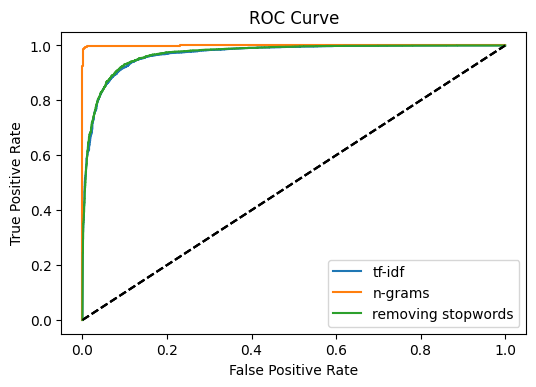

In [33]:
get_model_roc([model,model_ngrams,model_removed], [X_test,X_test_n,X_test_new], ['tf-idf','n-grams','removing stopwords'], df_imdb_test['class'])
# get_model_roc([model_ngrams], [X_test_n], ['Naive Bayes'], df_imdb_test['class'])
# get_model_roc([model_removed], [X_test_new], ['Naive Bayes'], df_imdb_test['class'])

After comparing the accuracy and roc_curve, the accuracy using n-grams are the highest one.

## Part II: Multi-Class Text Classification

There are lots of applications of text classification in the commercial world. For example, news stories are typically organized by topics; content or products are often tagged by categories; users can be classified into cohorts based on how they talk about a product or brand online. 

Suppose you've been hired by a finance institution that wants to classify incoming consumer complaints in product categories in order to forward them to the most appropriate customer support agents. You have a sample of the complaints that have been addressed in the past, each of them labeled as one category by the agent that addressed the complaint. Each complaint is assigned to one and only one category. 

Let's take a look at the data.

__1. Load the data. No points for this.__

In [0]:
# Remember to change this to the path of your file.
complaints_path = 'data/complaints_sample.csv'

data = pd.read_csv(complaints_path)
data.head()

,Consumer complaint narrative,Product
0,This is not a duplicate case. Please escalate ...,Credit card or prepaid card
1,I reported the problem to Money gram agent. wo...,"Money transfer, virtual currency, or money ser..."
2,"Medical debt is not mine, debt is my sons who ...",Debt collection
3,"Someone called me yesterday morning, XX/XX/201...",Debt collection
4,This is a debt with Conn 's - I am not 30 days...,Debt collection


__2. Print how many complaints there are for each product category.__

In [0]:
# Your answer here.
data.groupby(data['Product']).count()

,Consumer complaint narrative
Product,
Bank account or service,2985
Checking or savings account,2485
Consumer Loan,1868
Credit card or prepaid card,8333
"Credit reporting, credit repair services, or other personal consumer reports",24401
Debt collection,17065
"Money transfer, virtual currency, or money service",1345
Mortgage,10552
"Payday loan, title loan, or personal loan",1223


__3. Split the data into a training and a test set. Build a logistic regression model to classify complaints according to product categories. Report its accuracy when applied to the test set. Why is this number relatively low compared to the binary accuracy in Part I? HINT: You may want to use [factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) to transform the target variable into a categorical variable. Take a look at the sample code below.__

In [0]:
# Example of how to transform a text variable into a categorical variable
Y, cat_names = data['Product'].factorize() 

In [0]:
data['cat_names'] = Y

In [0]:
# Your answer here.
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [0]:
cv_part2 = CountVectorizer()
cv_part2.fit(train['Consumer complaint narrative'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
X_train_2 = cv_part2.transform(train['Consumer complaint narrative'])
X_test_2 = cv_part2.transform(test['Consumer complaint narrative'])

In [0]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_2, train['cat_names'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
print ("Accuracy on testing = %.4f" % accuracy_score(log_model.predict(X_test_2), test['cat_names']) )

Accuracy on testing = 0.7640


Why is this number relatively low compared to the binary accuracy in Part I?

Because there are more catetories than the binary one. And in each class, it is not balanced.

__4. Make a confusion matrix that shows the errors made by your model. Use the test set labels and your predictions for the test set to build the matrix. Plot the confusion matrix using a Seaborn heatmap. What would perfect predictions look like? Give an example of one systematic type of error that you see. How can you tell that this is a systematic error? Why do you think such errors occur? HINT: Below there is code building and plotting a confusion matrix using the entire data and random predictions. The code removes the diagonal to highlight prediction errors.__

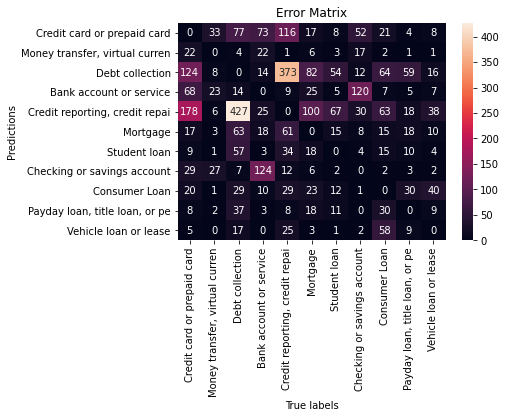

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt


tick_labels = [c[:30] for c in cat_names]
def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(cat_names)), len(Y))
random_conf_mat = confusion_matrix(log_model.predict(X_test_2), test['cat_names'])
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)

The number in the Error Matrix of perfect prediction will be about to 0 in every area. 

Different from random error, the systematic error is the errors that the human-being could not avoid. 

I think the systematic error in this case is the misclassification of 'debet collection' and 'Credit reporting, credit repair services, or other personal consumer reports'. 	

__5. Suppose that the priority level of complaints varies by product category. You know that higher priority complaints need to be addressed faster. You also know that complaints incorrectly classified by the model will be given the correct classification (and therefore also the correct priority) by the first agent to which the complaint is assigned. If the agent has no knowledge about the product category of the complaint, he/she can forward the complaint to someone else. This is how priority level varies by product:__

__High priority__
* 'Money transfer, virtual currency, or money service'
* 'Bank account or service'
* 'Checking or savings account'

__Normal priority__
* 'Credit card or prepaid card'
* 'Mortgage'
* 'Student loan'
* 'Consumer Loan'
* 'Payday loan, title loan, or personal loan'
* 'Vehicle loan or lease'

__Low priority__
* 'Credit reporting, credit repair services, or other personal consumer reports'
* 'Debt collection'

__Below you will find three cost matrices. Compute the total cost of your model according to each of them. If you were to compare multiple models, which cost matrix do you think would be better to compare the models? Why? Would you consider making any modifications to the cost matrix that you chose? If so, explain what would you consider changing and why. HINT: Below there is a sample code of how to compute the total cost of the random predictions.__

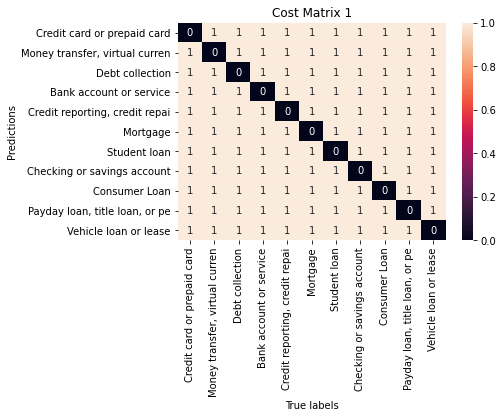

In [0]:
cost_matrix_1 = np.array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_1, 'Cost Matrix 1')

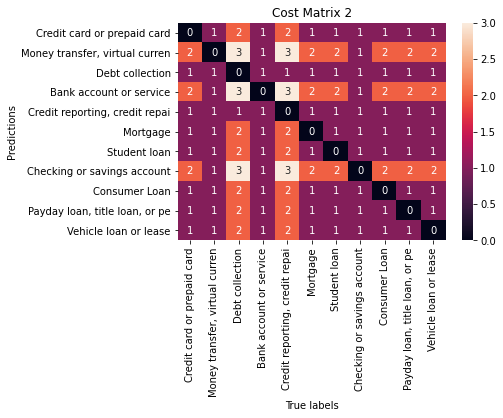

In [0]:
cost_matrix_2 = np.array([[0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_2, 'Cost Matrix 2')

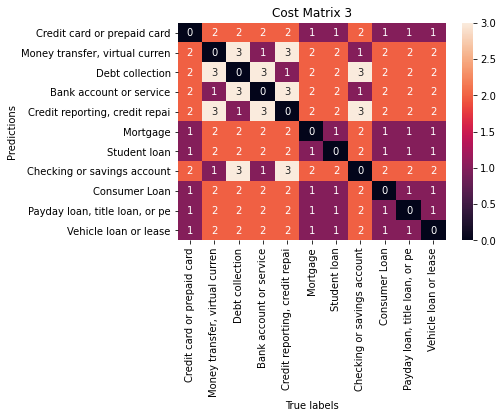

In [0]:
cost_matrix_3 = np.array([[0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 0, 3, 1, 2, 2, 3, 2, 2, 2],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 1, 3, 0, 2, 2, 3, 2, 2, 2],
                          [1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1],
                          [1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0]])
plot_matrix(cost_matrix_3, 'Cost Matrix 3')

In [0]:
# Replace random_conf_mat with the confusion matrix you generated in the last question.

print("Cost with matrix 1: ", (random_conf_mat * cost_matrix_1).sum())
print("Cost with matrix 2: ", (random_conf_mat * cost_matrix_2).sum())
print("Cost with matrix 3: ", (random_conf_mat * cost_matrix_3).sum())

Cost with matrix 1:  3567
Cost with matrix 2:  4410
Cost with matrix 3:  5677


The first cost matrix do not consider about the different priority of different class. And after comparing the second and the third matrix, I think the third one is better since it is more balanced and symmetrical. And after adding the cost of all priority level, only the third one corresponds to the real priority situation. 

I think the third one is perfect and I do not need to make any changes to the third one.

My trial changes is below(I changed the weight according to the priority level and build a new weighted- logistic regression model):



In [0]:
class_weight = {0:2, 1:3, 2:1, 3:3, 4:1, 5:2, 6:3, 7:2, 8:2, 9:2, 10:2} # according to the priority level
log_model_new = LogisticRegression(class_weight=class_weight,max_iter=5000) #I changed the class_weight parameter in the log_model
log_model_new.fit(X_train_2, train['cat_names']) 
random_conf_mat = confusion_matrix(log_model_new.predict(X_test_2), test['cat_names'])
print("Cost with matrix 1: ", (random_conf_mat * cost_matrix_1).sum())
print("Cost with matrix 2: ", (random_conf_mat * cost_matrix_2).sum())
print("Cost with matrix 3: ", (random_conf_mat * cost_matrix_3).sum())

Cost with matrix 1:  3653
Cost with matrix 2:  4739
Cost with matrix 3:  5851
